<a href="https://colab.research.google.com/github/gerin98/Alarm/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1 - Clustering with K-means

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# dimensions are 569 x 30
# 569 row entries, 30 features in each row
# there are 2 targets benign and malignant

# import data as array
breast_cancer_data = np.array(dataset.data, float)

# dictionary to store all predictions made. Used to select the iteration that 
# resulted in the least loss
# key: loss 
# value: (c, centroids)
all_predictions = {}

#### Choose Number of Clusters
- pass in the dataset and the number of clusters we expect
- get n random numbers from the range x without replacement
  - n is the number of clusters
  - x is the number of data points
- select data points from the dataset at these indices as your starting centroids

In [85]:
def select_clusters(_data, _num_clusters):
  random_centroids = np.random.choice(range(0, _data.shape[0]), _num_clusters, 
                                      replace = False)
  return np.take(_data, random_centroids, axis = 0)

#### Closest Centroids
- pass in the dataset and the centroids
- find the distance between each point and centroid
- this can be done by finding the norm between these 2 points
- square this result
- both distances are stored in c where column1 corresponds to centroid1, column2 corresponds to centroid2 etc.

In [86]:
def closest_centroids(_data, centroids):
  c = np.zeros((_data.shape[0], centroids.shape[0]))
  for x in range(_data.shape[0]):
    dist = np.linalg.norm(_data[x] - centroids, axis=1)
    c[x] = np.square(dist)
  return c

#### Cluster Assignment
- pass in an array of size (# data points, # clusters)
- each data point (row) will contain it's distance to every cluster (col)
- assign each data point to its closest cluster by finding the index of the smallest value in each row
- returns an array of size (# data points, 1) where each row contains the centroid that point is assigned to
- eg. if `array[k] == 0` means point k is part of centroid 0

In [87]:
def cluster_assignment(closest):
  return closest.argmin(axis=1)

#### Move Centroid
- takes data set, centroids, and the centroid assignment for each point
- get the subset of the data set assigned to each centroid (eg. get all data points assigned to centroid 1)
- calculate the mean of this subset
  - mean is calculated along the column (avg value of each feature)
- replace the old centroid, using the mean value as the new centroid
- return the array of new centroids

In [88]:
def move_centroid(_data, centroids, c):
  new_centroids = np.zeros_like(centroids)
  for x in range(centroids.shape[0]):
      assigned_points = _data[c == x]
      centroid_mean = np.mean(assigned_points, axis = 0)
      new_centroids[x] = centroid_mean
  return new_centroids

#### Distortion
- take in the data set, centroids and the centroid assignment for each point
- calculate the loss of this prediction
- use the norm to calculate the distance between each data point and its centroid. Square this value to get the error
- Accumulate the error for each data point and divide by the number of data points to get the average error

In [89]:
def calculate_loss(_data, centroids, c):
  error_sum = 0
  for x in range(centroids.shape[0]):
    assigned_points = _data[c == x]
    error_dist = np.linalg.norm(assigned_points - centroids[x], axis=1)
    error_square = np.square(error_dist)
    error_sum += error_square.sum()
  error_avg = error_sum / _data.shape[0]
  return error_avg

#### Run the Algorithm
- `predict` runs the k-means algorithm
  - the algorithm is run for a maximum of 100 iterations. If the centroids dont change between iterations, we early return.
  - it will return the cluster assignment for each data point and the cluster centroids
- `k_means` re-runs the k-means algorithm 5 times, calculating the loss for each prediction. It returns the prediction that experienced the least loss. The best prediction taken over multiple executions of the algorithm will reduce the chance of returning a solution that is not locally optimal
  - it will return the cluster assignment for each data point and the cluster centroids

In [90]:
def predict(_data, centroids):
  for i in range(100):
    old_centroids = centroids

    closest = closest_centroids(_data, centroids)
    c = cluster_assignment(closest)
    centroids = move_centroid(_data, centroids, c)

    comparison = old_centroids == centroids
    if comparison.all():
      break

  return c, centroids

In [91]:
def k_means(_data, _num_clusters):
  all_predictions.clear()
  
  for i in range(5):
    centroids = select_clusters(_data, _num_clusters)
    c, centroids = predict(_data, centroids)
    l = calculate_loss(_data, centroids, c)
    all_predictions[l] = (c, centroids)
  
  i = min(all_predictions.keys())
  return all_predictions[i][0], all_predictions[i][1]

### Q1
- the function `k-means` takes in your dataset and a value of K and returns the cluster centroids along with the cluster assignment for each data point

In [92]:
# dataset to use and number of clusters we expect
_data, _k = breast_cancer_data, 4

# calculate k means. Returns the centroid assignments and the centroids
c, centroids = k_means(_data, _k)

### Q2
- the function `plot_loss` runs the k-means algorithm 6 times with values of K ranging from 2 to 7 and plots the loss
- lines 5 - 7 are responsible for actually running the algorithm with different values of K
- the inputs to the algorithm here is the dataset `_data` from `load_breast_cancer` which contains 562 datapoints with 30 features. It also takes in an input `_x` which represents the K value. `_data` remains constant among every iteration but `_x` will increment by 1 each time to calculate K-means for the dataset with values of K varying from 2 to 7

In [158]:
def plot_loss(_data):
  losses = np.zeros(6)
  num_clusters = np.array(range(2,8)) 

  for x in range(2, 8):
    c, centroids = k_means(_data, x)
    losses[x-2] = calculate_loss(_data, centroids, c)

  plt.plot(num_clusters, losses)
  plt.ylabel('Distortion, J')
  plt.xlabel('Number of clusters, K')
  plt.title('Distortion of K-means clustering for the breast cancer dataset')
  plt.show()

### Q3
- call the function `plot_loss` to run the algorithm with values of K ranging from 2 to 7 and plot the loss for each iteration

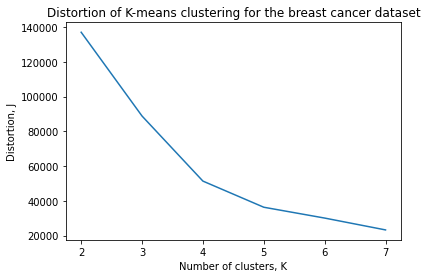

In [159]:
# dataset to use
_data = breast_cancer_data

# plot the loss of the k-means algorithm with various values of K
plot_loss(_data)

### Q4
- A good value for K qould be 4. We can see from the elbow graph above that the slope changes dramatically when K = 4. The "elbow" or the inflection point of the curve shows that the model is a good fit at this point.